In [1]:
import mytools
import pandas as pd

In [2]:
数据表 = mytools.读取SPSS数据文件(R'C:\Users\LENOVO\Desktop\statistic\data\demo.sav')

In [3]:
#数据清理重复值处理空白值处理异常值处理变量类型设置逻辑一致性清理

In [4]:
数据表.rename(columns={
    '@10、1您家里有':'家庭规模',
    '@10、2口人，是':'代际',
    '@3、您的婚姻状况：':'婚姻状况',
    '@9、您的月收入大约是多少？':'月收入',
    '@1、您的性别：':'性别',
    '@4、您的受教育程度是：':'教育程度',
    '@8、您的职业是：':'职业',
    '@2、您的年龄：	':'年龄',
    '@5、您的政治面貌：':'政治面貌',
    '@7、您的信仰是：':'信仰',
    '@28、问卷编号':'问卷编号',
    '@10、3代人，家里有':'三代人',
    '@10、4位老人，家里有':'四位老人',
    '@10、5个小孩，外出打工的人有___人。':'五个小孩',
    '@11、您平常是否通过电脑上网？':'电脑上网',
    '@12、您平常是否通过手机上网？':'手机上网',
    '@15、3分钟，您每个月的手机话费为':'三分钟的话费',
    '@15、1您每天通过手机上网的时间大概为':'上网时间',
    '@14、您平时一周有几天通过手机上网？':'一周几天上网',
    }, inplace=True)

In [5]:
### 重复值处理
数据表.drop_duplicates(subset=['序号'],keep='first',inplace=True)

In [6]:
### 空白值处理
# 查看变量是否存在空白值
数据表[数据表.isnull().T.any()].head()
# 数据表['婚姻状况'].isnull()

,序号,性别,@2、您的年龄：,婚姻状况,教育程度,政治面貌,信仰,职业,月收入,家庭规模,...,@27、调研地点,问卷编号,@30、问卷录入过程中其他需要说明的问题（若没,年龄段,每周上网时长,生活满意度,生活满意度区间,工作满意度,工作满意度区间,自尊
0,94.0,1.0,58.0,NaN,未上过学,群众,佛教,牧民,NaN,NaN,...,郭卓村,GZ04,(空),5.0,NaN,24.0,基本满意,25.0,基本满意,30.0
1,30.0,1.0,45.0,已婚,未上过学,群众,佛教,牧民,NaN,NaN,...,唐尕村,TG30,无,4.0,NaN,26.0,满意,26.0,满意,30.0
2,31.0,1.0,48.0,已婚,未上过学,群众,佛教,牧民,NaN,NaN,...,唐尕村,TG31,无,4.0,NaN,29.0,满意,27.0,满意,30.0
3,93.0,1.0,74.0,已婚,小学,中共党员,佛教,村干部,NaN,NaN,...,郭卓村,GZ03,(空),6.0,0.000000,33.0,非常满意,32.0,非常满意,35.0
4,76.0,1.0,31.0,已婚,小学,群众,佛教,牧民,NaN,7.0,...,龙多村,LD02,无,3.0,9.333333,25.0,基本满意,25.0,基本满意,29.0


In [7]:
# 对指定变量填充空白值
数据表['婚姻状况'].fillna('已婚', inplace=True)
数据表['月收入'].fillna('三千元以下', inplace=True)
数据表['家庭规模'].fillna(6, inplace=True)

In [8]:
# 对特定值进行替换
数据表['代际'].replace({'(空)':None}, inplace=True)
数据表['代际'].fillna(3, inplace=True)
数据表['三分钟的话费'].replace({'nan':None},inplace=True)
数据表['三分钟的话费'].fillna(50,inplace=True)
数据表['上网时间'].replace({'nan':None},inplace=True)
数据表['上网时间'].fillna(0,inplace=True)

In [9]:
# 设定变量类型
数据表.astype({'代际':'int'}).head(2)


,序号,性别,@2、您的年龄：,婚姻状况,教育程度,政治面貌,信仰,职业,月收入,家庭规模,...,@27、调研地点,问卷编号,@30、问卷录入过程中其他需要说明的问题（若没,年龄段,每周上网时长,生活满意度,生活满意度区间,工作满意度,工作满意度区间,自尊
0,94.0,1.0,58.0,已婚,未上过学,群众,佛教,牧民,三千元以下,6.0,...,郭卓村,GZ04,(空),5.0,NaN,24.0,基本满意,25.0,基本满意,30.0
1,30.0,1.0,45.0,已婚,未上过学,群众,佛教,牧民,三千元以下,6.0,...,唐尕村,TG30,无,4.0,NaN,26.0,满意,26.0,满意,30.0


In [10]:
数据表.columns

Index(['序号', '性别', '@2、您的年龄：', '婚姻状况', '教育程度', '政治面貌', '信仰', '职业', '月收入',
       '家庭规模', '代际', '三代人', '四位老人', '五个小孩', '电脑上网', '手机上网',
       '@13、您平时一周有几天通过电脑上网？', '一周几天上网', '上网时间', '@15、2分钟，您每天通过电脑上网的时间为',
       '三分钟的话费', '@15、4元，您家的宽带费为___元。', '@16、互联网使用行为（问卷17题至26题）—17、您',
       '@16、18、您认为您在上网时使用搜索引擎（百度', '@16、19、您经常会通过互联网（辣椒直播、下厨',
       '@16、20、您认为您玩手机网络游戏（斗地主、斗', '@16、21、您经常会通过互联网观看小说么？',
       '@16、22、您经常会通过互联网观看视频（快手、', '@16、23、您认为您通过即时通讯（微信、QQ）与他',
       '@16、24、您经常会通过社交网络（微博、陌陌、', '@16、25、您认为您在互联网（淘宝、拼多多、京',
       '@16、26、您经常使用移动支付（支付宝、微信支', 'Q17_1_我目前的生活接近我理想的状态',
       'Q17_2_我的生活条件在各方面都很不错。', 'Q17_3_对我目前的生活，我很满意。',
       'Q17_4_到目前为止，我已经得到了我想要的东西', 'Q17_5_如果我能再活一次我没有什么要改变',
       '@18、请表述您最近一周的情感状况—6.爱', '@18、7.愉悦', '@18、8.自豪', '@18、9.愤怒',
       '@18、10.忧虑', '@18、11.悲哀', '@19、第三部分—1.我能够获得足够有用的媒介信',
       '@19、2.我能够不断更新自己的信息获取技能。', '@19、3.我具有较强的信息获取意识。',
       '@19、4.我能够熟练使用软件工具进行信息检索。', '@19、5.我能够通过寻找佐证资料判断信息的可信',
       '@19、6.能够通过标题、内容等判断信息的可信度', '@19、7.我能够判

In [11]:
# 生成变量
数据表['信息鉴别能力'] = 数据表['@19、9.我能够通过信息发布机构的权威性判断信']     + 数据表['@19、10.我通过网络微信微博QQ等分享社会时事新']
+ 数据表['@19、11.我通过网络微信微博QQ等参与投票、网络']
+ 数据表['@19、12.我通过网络参与社会公共事件讨论。']
+ 数据表['@19、13.我通过网络微信微博QQ等参与社会实践。']

0     2.0
1     2.0
2     2.0
3     2.0
4     3.0
     ... 
89    3.0
90    4.0
91    2.0
92    4.0
93    2.0
Name: @19、13.我通过网络微信微博QQ等参与社会实践。, Length: 94, dtype: float64

In [12]:
#数据分析，明确数据分析目标
#对样本的情况进行描述统计
#x变量与y变量有相关性（三分钟话费和上网时间有相关性）
#a、b、c变量影响Y变量（是否有其他因素对上网时间产生影响）

In [13]:
#单变量分析
##无序类别变量描述统计（得到数据，绘制柱状图）
描述统计结果表=mytools.有序变量描述统计函数(数据表,'上网时间')
描述统计结果表

,count,比例,累计比例
上网时间,,,
0.0,24,0.255319,0.255319
80.0,4,0.042553,0.297872
180.0,2,0.021277,0.319149
240.0,1,0.010638,0.329787
30.0,16,0.170213,0.500000
60.0,18,0.191489,0.691489
10.0,2,0.021277,0.712766
45.0,1,0.010638,0.723404
50.0,1,0.010638,0.734043


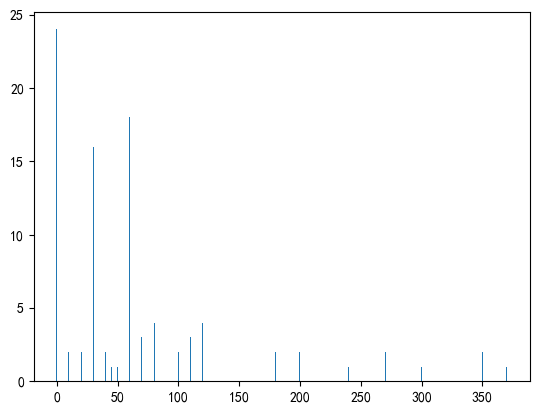

In [14]:
mytools.绘制柱状图(描述统计结果表)

In [40]:
#对单变量数据进行分析（置信区间和均值分析，论证是否可行）

from scipy import stats
# 计算均值和标准误差
mean = 数据表['上网时间'].mean()
std_error = stats.sem(数据表['上网时间'])
# 设定置信水平
confidence_level = 0.95
# 设定自由度
df = len(数据表['上网时间']) - 1
# 计算置信区间
confidence_interval = stats.t.interval(confidence_level, df, loc=mean, scale=std_error)
# 输出结果
print(F"均值：{mean: .2f}")
print(F"均值在置信水平{confidence_level}下的置信区间为：", confidence_interval)


均值： 66.60
均值在置信水平0.95下的置信区间为： (49.531030319206025, 83.66045904249611)


In [ ]:
#对单变量分析的结论：均值在置信水平之间，能够进行进一步的变量分析。

In [27]:
#双变量数据分析（三分钟的话费和上网时间的关系）
tau_y = mytools.goodmanKruska_tau_y(数据表,'三分钟的话费','上网时间')
print(tau_y)

0.20811637626706125


In [28]:
#判断其相关性的强弱（三分钟的话费和上网时间呈现出弱相关）
mytools.相关系数判断(tau_y)

'弱相关'

In [29]:
# 创建三分钟的话费和上网时间的交互表
cross_tab = pd.crosstab(index=[数据表['上网时间']], 
                        columns=数据表['三分钟的话费'], margins=True, normalize=True)  # All 行和列的总和

cross_tab

三分钟的话费,0.0,20.0,30.0,40.0,45.0,48.0,49.0,50.0,57.0,60.0,68.0,90.0,100.0,110.0,120.0,180.0,All
上网时间,,,,,,,,,,,,,,,,,
0.0,0.06383,0.010638,0.042553,0.031915,0.000000,0.000000,0.000000,0.085106,0.010638,0.010638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.255319
10.0,0.00000,0.010638,0.010638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277
15.0,0.00000,0.000000,0.000000,0.010638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010638
20.0,0.00000,0.000000,0.010638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010638,0.000000,0.000000,0.000000,0.021277
30.0,0.00000,0.000000,0.031915,0.031915,0.000000,0.000000,0.042553,0.042553,0.000000,0.000000,0.000000,0.000000,0.010638,0.000000,0.010638,0.000000,0.170213
40.0,0.00000,0.000000,0.000000,0.010638,0.000000,0.000000,0.000000,0.010638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277
45.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010638,0.000000,0.000000,0.000000,0.010638
50.0,0.00000,0.000000,0.010638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010638
60.0,0.00000,0.000000,0.031915,0.010638,0.010638,0.000000,0.021277,0.053191,0.000000,0.010638,0.000000,0.021277,0.021277,0.000000,0.000000,0.010638,0.191489


In [30]:
mytools.两个无序类别变量的统计分析(数据表,'三分钟的话费','上网时间')

tau_y系数: 0.2081 弱相关
---  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 20  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 30  4  1  0  1  3  0  0  1  3  1  1  0  0  0  0  0  0  0  0  0  0
 40  3  0  1  0  3  1  0  0  1  0  0  1  0  0  0  0  1  0  0  0  0
 45  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
 48  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
 49  0  0  0  0  4  0  0  0  2  0  0  0  0  0  1  0  0  0  0  0  0
 50  8  0  0  0  4  1  0  0  5  2  3  0  0  1  0  2  0  1  0  0  0
 57  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 60  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
 68  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
 90  0  0  0  0  0  0  0  0  2  0  0  0  2  0  1  0  0  1  1  1  0
100  0  0  0  1  1  0  1  0  2  0  0  1  1  1  0  0  0  0  0  1  0
110  0  0  0  0  0  0  0  0  0  0  0  0  0

In [39]:
mytools.两个无序类别变量的统计分析(数据表,'月收入','上网时间')

tau_y系数: 0.0371 极弱相关或无相关
------------  --  -  -  -  -  -  -  -  --  -  -  -  -  -  -  -  -  -  -  -  -
无收入         3  0  0  0  1  0  0  0   2  0  0  0  0  0  0  0  1  0  0  0  0
三千元以下    16  1  0  0  9  0  1  1   5  0  2  1  1  1  2  0  0  1  0  0  1
三千到六千元   5  1  1  2  6  2  0  0  11  3  2  1  2  3  0  2  0  1  1  2  0
------------  --  -  -  -  -  -  -  -  --  -  -  -  -  -  -  -  -  -  -  -  -
卡方值： 45.47, p值： 0.2547,自由度:40。
接受虚无假设


In [ ]:
#结论：这个两个无序变量是能够可以接受的虚无假设，那么通过tau_y的分析，可以知道两者呈现弱相关，但是具有一定的相关性，需要更多的数据资料进行进一步验证。
#关于月收入和上网时间的关系是极弱的，但是数据不足以证明，在三分钟的话费与上网时间的相关性是弱相关，但是假设成立，需要更多的数据。

In [35]:
#进行多变量分析（三分钟的话费和月收入会在一定相关程度上影响上网时间）

# 创建三者的交互表
cross_tab = pd.crosstab(index=[数据表['上网时间'], 数据表['月收入']], 
                        columns=数据表['三分钟的话费'], margins=True, normalize=True)  # All 行和列的总和

cross_tab

三分钟的话费             0.0      20.0      30.0      40.0      45.0      48.0  \
上网时间  月收入                                                                  
0.0   无收入     0.010638  0.010638  0.010638  0.000000  0.000000  0.000000   
      三千元以下   0.031915  0.000000  0.031915  0.021277  0.000000  0.000000   
      三千到六千元  0.021277  0.000000  0.000000  0.010638  0.000000  0.000000   
10.0  三千元以下   0.000000  0.010638  0.000000  0.000000  0.000000  0.000000   
      三千到六千元  0.000000  0.000000  0.010638  0.000000  0.000000  0.000000   
15.0  三千到六千元  0.000000  0.000000  0.000000  0.010638  0.000000  0.000000   
20.0  三千到六千元  0.000000  0.000000  0.010638  0.000000  0.000000  0.000000   
30.0  无收入     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
      三千元以下   0.000000  0.000000  0.021277  0.021277  0.000000  0.000000   
      三千到六千元  0.000000  0.000000  0.010638  0.010638  0.000000  0.000000   
40.0  三千到六千元  0.000000  0.000000  0.000000  0.010638  0.000000  0.000000   
45.0  三千元以下   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
50.0  三千元以下   0.000000  0.000000  0.010638  0.000000  0.000000  0.000000   
60.0  无收入     0.000000  0.000000  0.021277  0.000000  0.000000  0.000000   
      三千元以下   0.000000  0.000000  0.010638  0.010638  0.000000  0.000000   
      三千到六千元  0.000000  0.000000  0.000000  0.000000  0.010638  0.000000   
70.0  三千到六千元  0.000000  0.000000  0.010638  0.000000  0.000000  0.000000   
80.0  三千元以下   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
      三千到六千元  0.000000  0.000000  0.010638  0.000000  0.000000  0.000000   
100.0 三千元以下   0.000000  0.000000  0.000000  0.010638  0.000000  0.000000   
      三千到六千元  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
110.0 三千元以下   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
      三千到六千元  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
120.0 三千元以下   0.000000  0.000000  0.000000  0.000000  0.000000  0.010638   
      三千到六千元  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
180.0 三千元以下   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
200.0 三千到六千元  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
240.0 无收入     0.000000  0.000000  0.000000  0.010638  0.000000  0.000000   
270.0 三千元以下   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
      三千到六千元  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
300.0 三千到六千元  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
350.0 三千到六千元  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
370.0 三千元以下   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
All           0.063830  0.021277  0.159574  0.117021  0.010638  0.010638   

三分钟的话费            49.0      50.0      57.0      60.0      68.0      90.0  \
上网时间  月收入                                                                  
0.0   无收入     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
      三千元以下   0.000000  0.074468  0.010638  0.000000  0.000000  0.000000   
      三千到六千元  0.000000  0.010638  0.000000  0.010638  0.000000  0.000000   
10.0  三千元以下   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
      三千到六千元  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
15.0  三千到六千元  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
20.0  三千到六千元  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
30.0  无收入     0.010638  0.000000  0.000000  0.000000  0.000000  0.000000   
      三千元以下   0.010638  0.021277  0.000000  0.000000  0.000000  0.000000   
      三千到六千元  0.021277  0.021277  0.000000  0.000000  0.000000  0.000000   
40.0  三千到六千元  0.000000  0.010638  0.000000  0.000000  0.000000  0.000000   
45.0  三千元以下   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
50.0  三千元以下   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
60.0  无收入     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
      三千元以下   0.000000  0.000000  0.000000  0.0

In [38]:
#进行卡方检验（第一个是卡方统计量的值。通常情况下，卡方值越大，说明观察频数与期望频数之间的差异越大。
# 第二个是p值（p-value）。p值越小，说明观察到的数据越不可能发生，即观察到的数据具有统计显著性。
#第三个是自由度，在卡方检验中，自由度通常指的是在计算期望频数时使用的参数数量减去1。

from scipy import stats
# 假设我们关注的是三千元以下的工资
specific_money = '三千到六千元'

# 筛选出特定月收入的数据
df_specific_money = 数据表[数据表['月收入'] == specific_money]

# 创建会打多少分和政治面貌的交互表
cross_tab_specific_money = pd.crosstab(df_specific_money['三分钟的话费'], df_specific_money['上网时间'])

# 进行卡方检验
chi2_money, p_money, dof_money, expected_money = stats.chi2_contingency(cross_tab_specific_money)

chi2_money, p_money, dof_money, 

(132.68441558441558, 0.5402609847116274, 135)

In [ ]:
#P值等于0.54表示我们没有足够的证据拒绝原假设，不能否认三分钟话费与上网时间没有相关性，需要进一步研究或收集更多的数据来验证。
# 通过上述的数据证明，三者之间是有关系的，尽管不是强相关，但仍需要许多数据对成立的假设进行进一步的判断。
#通过对上述的证明，可以得知我的研究目标：三分钟话费和上网时间有相关性。这个研究目标是可以实现的。针对其他因素的影响需要有有更多的数据。